In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
model = tf.keras.models.load_model('./mnist_no_batch.h5')
mnist = tf.keras.datasets.mnist
(f_image_train, f_label_train), (f_image_test, f_label_test) = mnist.load_data()
f_image_train, f_image_test = f_image_train / 255.0, f_image_test / 255.0
num = 10
predict = model.predict(f_image_train[:num])
print(f_label_train[:num])
print(" * Prediction, ", np.argmax(predict, axis = 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[5 0 4 1 9 2 1 3 1 4]
 * Prediction,  [7 7 7 7 7 7 7 7 7 7]


In [5]:
model = tf.keras.models.load_model('./mnist_with_batch.h5')
mnist = tf.keras.datasets.mnist
(f_image_train, f_label_train), (f_image_test, f_label_test) = mnist.load_data()
f_image_train, f_image_test = f_image_train / 255.0, f_image_test / 255.0
num = 10
predict = model.predict(f_image_train[:num])
print(f_label_train[:num])
print(" * Prediction, ", np.argmax(predict, axis = 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
[5 0 4 1 9 2 1 3 1 4]
 * Prediction,  [5 0 4 1 9 2 1 3 1 4]


In [6]:
model = tf.keras.models.load_model('./mnist_batch_relu.h5')
mnist = tf.keras.datasets.mnist
(f_image_train, f_label_train), (f_image_test, f_label_test) = mnist.load_data()
f_image_train, f_image_test = f_image_train / 255.0, f_image_test / 255.0
num = 10
predict = model.predict(f_image_train[:num])
print(f_label_train[:num])
print(" * Prediction, ", np.argmax(predict, axis = 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[5 0 4 1 9 2 1 3 1 4]
 * Prediction,  [3 0 4 1 9 2 1 3 1 4]


In [7]:
import pickle
historyNoBatch = pickle.load(open('./historyNoBatch', "rb"))
historyWithBatch = pickle.load(open('./historyWithBatch', "rb"))
historyBatchRelu = pickle.load(open('./historyBatchReLu', "rb"))
val_accNB = historyNoBatch["val_accuracy"]
val_lossNB= historyNoBatch["val_loss"]
val_lossB = historyWithBatch["val_loss"]
val_accB = historyWithBatch["val_accuracy"]
val_lossL = historyBatchRelu["val_loss"]
val_accL = historyBatchRelu["val_accuracy"]

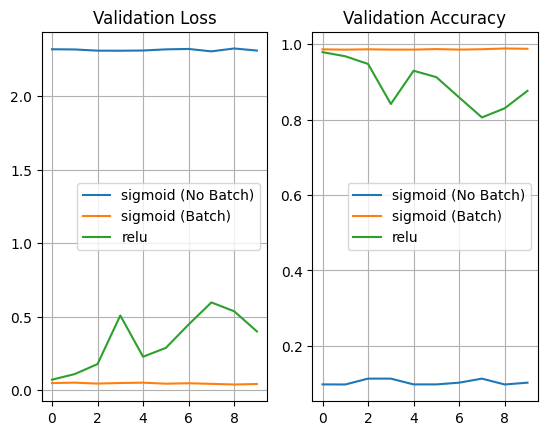

In [9]:
plt.subplot(1,2,1)
plt.title('Validation Loss')
plt.plot(range(len(val_lossNB)),val_lossNB,label = "sigmoid (No Batch)")
plt.plot(range(len(val_lossB)),val_lossB,label = "sigmoid (Batch)")
plt.plot(range(len(val_lossL)),val_lossL,label = "relu")
plt.grid()
plt.legend()
plt.subplot(1,2,2)
plt.title('Validation Accuracy')
plt.plot(range(len(val_accNB)),val_accNB,label = "sigmoid (No Batch)")
plt.plot(range(len(val_accB)),val_accB,label = "sigmoid (Batch)")
plt.plot(range(len(val_accL)),val_accL,label = "relu")
plt.grid()
plt.legend()
plt.savefig("Summary.png")
plt.show()